In [58]:
# Importing necessary libraries 
import sys
import numpy as np
import emcee
import astropy.io.fits as pyfits
import matplotlib.pylab as pl
import random,os
from multiprocessing import Pool
from multiprocessing import cpu_count
import time
from astropy.io import ascii
import corner
from astropy.table import Column


In [59]:
ncpu = cpu_count()
print("{0} CPUs".format(ncpu))
os.environ["OMP_NUM_THREADS"] = "1"

12 CPUs


In [60]:
np.float = float    
np.int = int   #module 'numpy' has no attribute 'int'
np.object = object    #module 'numpy' has no attribute 'object'
np.bool = bool    #module 'numpy' has no attribute 'bool'

In [61]:
#data  BgVriY
file = 'H_sbfj21_update3.csv' # change the filaname here if needed for other bands or for other calibrators
tab = ascii.read('../data/working/'+file)

# Result
f1 =open('../results/'+file[:-4]+'_resultst.5.txt','w') ### MUST change !!


In [62]:
c = 300000.
q=-0.53

In [63]:
if not 'SN2011iv' in tab['sn']:
    
    tab.add_row({'sn':'SN2011iv', 'st':0.699,'est':0.007,'zhel':0.0669 ,'zcmb':0.00618, 'Mmax':12.78, 'eMmax': .033, 'BV':0.031, 'eBV':0.011,'m':11.04, 'ml':10.78, 'mu':11.45,'covMs':-3.753e-05,'covBV_M':0.0 })


#tab = ascii.read('../data/working/'+file)
st = tab['st']
est = tab['est']
zhel = tab['zhel']
zcmb = tab['zcmb']
mmax = tab['Mmax']
emmax = tab['eMmax']
bv = tab['BV']
ebv = tab['eBV']
m_csp = tab['m']
eml = (tab['m']-tab['ml'])
emu = (tab['mu']-tab['m'])
em = (emu+eml)/2.
dist = tab['dist']
edist = tab['edist']
c_ms = tab['covMs']
c_mbv = tab['covBV_M']
sn = tab['sn']

ebv_host = tab['EBVmw']
print(np.max(ebv_host))

#pl.plot(st,bv, 'ro')
#pl.axvline(x=.75)
#pl.axhline(y=.15)
# change SNhunt281

#adding more calibrators from Garnavich 2023
#1
c1 = np.where(sn =='SN2006mr') #31.200 ± 0.093
dist[c1]=31.2
edist[c1]=0.093
print(sn[c1],dist[c1])
#2
c2 = np.where(sn =='SN2007on') # 31.453 ± 0.084
dist[c2]=31.453
edist[c2]=0.084
print(sn[c2],dist[c2])
#3
c3 = np.where(sn =='SNhunt281')# 32.369,0.078 same as SN2015bp from Jensen 2021
dist[c3]=32.369
edist[c3]=0.078
print(sn[c3],dist[c3])

# #4
c4 = np.where(sn =='SN2011iv')# # 31.453 ± 0.084
dist[c4]=31.453
edist[c4]=0.084
print(sn[c4],dist[c4])

ww = np.where(tab['sn']=='ASAS14ad')

print(bv[ww])


0.3692
   sn   
--------
SN2006mr dist
----
31.2
   sn   
--------
SN2007on  dist 
------
31.453
    sn   
---------
SNhunt281  dist 
------
32.369
   sn   
--------
SN2011iv  dist 
------
31.453
          BV         
---------------------
-0.010999999999999233


In [64]:
#selection
#w0 = np.where((tab['st']<0.75) & (tab['zcmb']>0.01) & (tab['EBVmw']<0.15) & (tab['sn']!='CSP14abk') &  (tab['sn']!='PTF13dyt') &  (tab['sn']!='PTF13dym') & (tab['sn']!='PTF14yw') & (tab['sn']!='PS1-13eao') & (tab['subtype']!='Ia-SC') & (tab['subtype']!='Ia-02cx') & (tab['sn']!='LSQ14fmg')& (tab['sn']!='SN2004dt')& (tab['sn']!='SN2005gj')& (tab['sn']!='SN2005hk')& (tab['sn']!='SN2006bt')& (tab['sn']!='SN2006ot')& (tab['sn']!='SN2007so')& (tab['sn']!='SN2008ae')& (tab['sn']!='SN2008bd')& (tab['sn']!='SN2008ha')& (tab['sn']!='SN2008J')& (tab['sn']!='SN2009dc')& (tab['sn']!='SN2009J')& (tab['sn']!='SN2010ae'))


# no cut
w0 = np.where((tab['sn']!='CSP14abk') &  (tab['sn']!='PTF13dyt') &  (tab['sn']!='PTF13dym') & (tab['sn']!='PTF14yw') & (tab['sn']!='PS1-13eao') & (tab['subtype']!='Ia-SC') & (tab['subtype']!='Ia-02cx') & (tab['sn']!='LSQ14fmg')& (tab['sn']!='SN2004dt')& (tab['sn']!='SN2005gj')& (tab['sn']!='SN2005hk')& (tab['sn']!='SN2006bt')& (tab['sn']!='SN2006ot')& (tab['sn']!='SN2007so')& (tab['sn']!='SN2008ae')& (tab['sn']!='SN2008bd')& (tab['sn']!='SN2008ha')& (tab['sn']!='SN2008J')& (tab['sn']!='SN2009dc')& (tab['sn']!='SN2009J')& (tab['sn']!='SN2010ae') & (tab['dist']<0))

# Calibrators
#w1 = ((tab['dist']>0) & (tab['st']<0.75) & (tab['EBVmw']<0.15))
w1 = np.where(tab['dist']>0)

# Mark's list 
supernovae = Column([
    "SN2005bl", "SN2006bd", "SN2006gt", "SN2006ob", "SN2007al", "SN2007mm",
    "SN2007ux", "SN2008R", "SN2009F", "CSP13aao", "KISS15m", "LSQ11pn",
    "LSQ12fvl", "LSQ13dkp", "LSQ14act", "LSQ14ajn", "LSQ14ip", "LSQ14jp",
    "PTF13ebh", "PTF14w", "SN2011jn", "SN2012ij", "SN2013ay"
], name="Supernovae")


#Common 
#supernovae = Column(['SN1981B','SN1994ae','SN1995al','SN2001el','SN2002fk','SN2007af','SN2007sr','SN2011fe','SN2012cg','SN2012fr','SN2013aa'],name="Supernovae")



# Adam 
#supernovae = Column(["SN1994D", "SN1981D", "SN2006dd", "SN2021pit", "SN2005df", "SN2011iv",
 #           "SN2018gv", "SN2021J", "SN2020nvb", "SN2017cbv", "SN2007erp", "SN2021rhu"], name="Supernovae")

#w1=[]

supernova_array = np.array(supernovae)
new_array = np.array(sn)

# Find indices of matching entries from supernova_column in new_column
match = np.array([np.where(new_array == name)[0][0] if name in new_array else -1 for name in supernova_array])

for name, idx in zip(supernova_array, match):
    if idx != -1:
        print(f"{name} found at index {idx} in new_column")
        
 #       w1.append(idx)
    else:
        print(f"{name} not found in new_column")
        

print (len(st[w0]),len(st[w1]))

print(sn[w1])


SN2005bl not found in new_column
SN2006bd found at index 115 in new_column
SN2006gt found at index 123 in new_column
SN2006ob found at index 129 in new_column
SN2007al found at index 135 in new_column
SN2007mm not found in new_column
SN2007ux found at index 150 in new_column
SN2008R found at index 153 in new_column
SN2009F found at index 178 in new_column
CSP13aao not found in new_column
KISS15m found at index 39 in new_column
LSQ11pn found at index 43 in new_column
LSQ12fvl found at index 47 in new_column
LSQ13dkp not found in new_column
LSQ14act not found in new_column
LSQ14ajn not found in new_column
LSQ14ip found at index 71 in new_column
LSQ14jp found at index 72 in new_column
PTF13ebh found at index 86 in new_column
PTF14w found at index 90 in new_column
SN2011jn not found in new_column
SN2012ij not found in new_column
SN2013ay found at index 206 in new_column
204 13
    sn   
---------
 CSP15aae
 PTF13ebh
 SN2000cx
 SN2003hv
 SN2006mr
 SN2007on
  SN2008R
 SN2008hs
 SN2008hv
 SN2

In [65]:
#initial guess
plim=-19.3, -19.2
p1lim =-1.2,-1.1
#p2lim=-.06,-0.05
p2lim =-1.2,-1.1

rvlim =2.7,2.71
alphalim=-0.11,-0.1
siglim=0.1,.12
vellim =300.,310
h0lim= 71.0,71.1

In [66]:
# Eqn 9 of Bruns 2018
def distmod(h,z1,z2):
    t1 = (1+z1)/(1+z2)
    t2 = (c*z2)/h
    t3 = 1 + (((1-q)/2)*z2)
    return (5*np.log10(t1*t2*t3)) +25


In [67]:
# Liklihood function
def like(par):
    p,p1,p2,rv,alpha,sig,vel,h0 = par

    mu_obs=[]
    mu_model=[]
    mu_stat=[]
    
    if  -25.0<p<14.0  and -10.0<p1<10.0 and -10.0<p2<10.0 and 0.<rv<10.0 and -1.<alpha<1. and 0.<sig<1. and 0. <vel <1000.0 and  0< h0 < 1000.0: # priors
        

        
        mu_sn = mmax[w0] - p - p1*(st[w0] - 0.5) -  p2*(st[w0] - 0.5)**2 - rv*bv[w0] - alpha*(m_csp[w0]-np.median(m_csp[w0]))

        mu_cal = mmax[w1] - p - p1*(st[w1] - 0.5) -  p2*(st[w1] - 0.5)**2 - rv*bv[w1] - alpha*(m_csp[w1]-np.median(m_csp[w1]))
        
        for mu_sn in mu_sn:
            mu_obs.append(mu_sn)
        for mu_cal in mu_cal:
            mu_obs.append(mu_cal)
        mu_model_sn = distmod(h0,zhel[w0],zcmb[w0])
        mu_model_cal = dist[w1]
        for mu_model_sn in mu_model_sn:
            mu_model.append(mu_model_sn)
        for mu_model_cal in mu_model_cal:
            mu_model.append(mu_model_cal)
        
        fac= (p1+(2*p2*st[w0]))
        fac1= (p1+(2*p2*st[w1]))
        
        velterm = (2.17*437.0)**2/(c*zcmb)**2

        err = (fac*est[w0])**2 +emmax[w0]**2 +(rv*ebv[w0])**2+2*fac*c_ms[w0]+rv*c_mbv[w0]+sig**2+(0.00000723*vel/zcmb[w0])**2+(alpha*em[w0])**2
        err1 = ((fac1*est[w1])**2) +(emmax[w1]**2) +((rv*ebv[w1])**2)+(2*fac1*c_ms[w1])+(rv*c_mbv[w1])+sig**2+(edist[w1]**2)+(alpha*em[w1])**2

        for err in err:
            mu_stat.append(err)
        for err1 in err1:
            mu_stat.append(err1)
        mu_stat=np.sqrt(mu_stat)

        mu_obs = np.array(mu_obs)
        mu_model = np.array(mu_model)
        mu_stat = np.array(mu_stat)
        dmu=mu_obs-mu_model
        
        chi =np.sum((dmu)**2/mu_stat**2)
        return -0.5*chi - (0.5*np.sum(np.log(2*np.pi*(mu_stat)**2))) 
    else:
        return -np.inf

In [68]:
#initial guess
plim=-17, -20
p1lim =-10,10
p2lim = -10,10
siglim=0,1
h0lim= 50.0,100

# EMCEE
ndim, nwalkers = 5, 50
ssize=1000
burnin = 500


# EMCEE
ndim, nwalkers = 8, 80
ssize=1000
burnin = 500


p00 = np.random.rand(nwalkers) * (plim[1] - plim[0]) + plim[0]
p10 = np.random.rand(nwalkers) * (p1lim[1] - p1lim[0]) + p1lim[0]
p20 = np.random.rand(nwalkers) * (p2lim[1] - p2lim[0]) + p2lim[0]
rv0 = np.random.rand(nwalkers) * (rvlim[1] - rvlim[0]) + rvlim[0]
alpha0 = np.random.rand(nwalkers) * (alphalim[1] - alphalim[0]) + alphalim[0]
sig0 = np.random.rand(nwalkers) * (siglim[1] - siglim[0]) + siglim[0]
vel0 = np.random.rand(nwalkers) * (vellim[1] - vellim[0]) + vellim[0]
h00 = np.random.rand(nwalkers) * (h0lim[1] - h0lim[0]) + h0lim[0]

#p0 = zip(*[p00,p10,p20,rv0,alpha0,sig0,vel0,h00])
p0 = np.array([p00,p10,p20,rv0,alpha0,sig0,vel0,h00]).T


In [69]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, like)
print ("running mcmc on "+file)
start = time.time()
sampler.run_mcmc(p0,ssize,progress=True)
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
end = time.time()
serial_time = end - start
print ("Mean acceptance fraction:", np.mean(sampler.acceptance_fraction))

running mcmc on H_sbfj21_update3.csv


100%|██████████| 1000/1000 [02:59<00:00,  5.58it/s]

Mean acceptance fraction: 0.45640000000000003


Text(0.5, 0, 'step number')

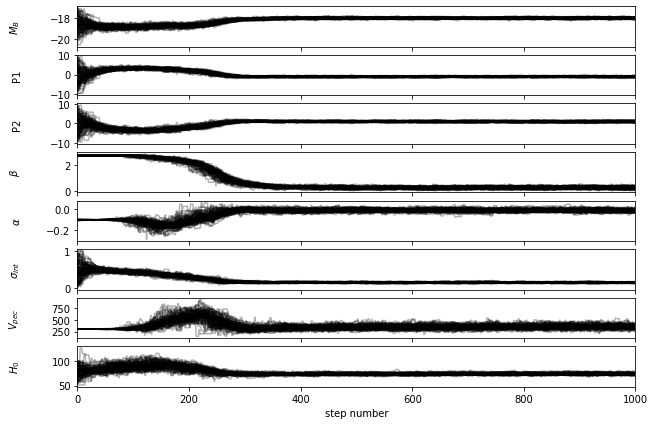

In [70]:
# Chains
fig, axes = pl.subplots(8, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$M_B$","P1", "P2", r"$\beta$",r"$\alpha$", r"$\sigma_{int}$",r"$V_{pec}$", r"$H_0$"]
for j in range(ndim):
    ax = axes[j]
    ax.plot(samples[:, :, j], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[j])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number")

In [71]:
samples = sampler.chain[:, burnin:, :].reshape((-1, ndim))
#tau = sampler.get_autocorr_time()
#print(tau)

 # Printing results
p0_mcmc,p1_mcmc,p2_mcmc,rv_mcmc,alpha_mcmc,sig_mcmc,vel_mcmc, H0_mcmc = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                             zip(*np.percentile(samples, [16, 50, 84],
                                                axis=0)))


print("""MCMC result:
    P0 = {0[0]} +{0[1]} -{0[2]} 
    P1 = {1[0]} +{1[1]} -{1[2]} 
    P2 = {2[0]} +{2[1]} -{2[2]} 
    Beta = {3[0]} +{3[1]} -{3[2]}
    Alpha = {4[0]} +{4[1]} -{4[2]}
    Sigma = {5[0]} +{5[1]} -{5[2]}
    Vpec = {6[0]} +{6[1]} -{6[2]}
    H0 = {7[0]} +{7[1]} -{7[2]}
    
    
""".format(p0_mcmc, p1_mcmc, p2_mcmc,rv_mcmc,alpha_mcmc,sig_mcmc,vel_mcmc, H0_mcmc))



f1.write('%s\t%s\t%s\t%s\t%s\t%s\t%s\t%s\n'%('p0','p1','p2','beta','alpha','sig_int','vel','H0'))

f1.write('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\n'%(p0_mcmc[0],p1_mcmc[0],p2_mcmc[0],rv_mcmc[0],alpha_mcmc[0],sig_mcmc[0],vel_mcmc[0],H0_mcmc[0]))

f1.write('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\n'%(p0_mcmc[1],p1_mcmc[1],p2_mcmc[1],rv_mcmc[1],alpha_mcmc[1],sig_mcmc[1],vel_mcmc[1],H0_mcmc[1]))
f1.write('%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\n'%(p0_mcmc[2],p1_mcmc[2],p2_mcmc[2],rv_mcmc[2],alpha_mcmc[2],sig_mcmc[2],vel_mcmc[2],H0_mcmc[2]))

f1.close()

MCMC result:
    P0 = -18.051405653953786 +0.06320782868316499 -0.06079284611866953 
    P1 = -1.1166864099927114 +0.24980168279777182 -0.2543681799774442 
    P2 = 0.8538011975075346 +0.31907173547906376 -0.31628691250654406 
    Beta = 0.23042886015225447 +0.08517008082503938 -0.08390045915653446
    Alpha = -0.012414698721537476 +0.013895563316672533 -0.013378066817329714
    Sigma = 0.14738220200356186 +0.013884023654198857 -0.012406990379873334
    Vpec = 350.04529572439594 +43.97170155505614 -41.67830030056609
    H0 = 73.53283409745843 +1.8400850659436543 -1.8909378549364675
    
    



# Mark's sample  cut

H0 = 76.62906596077508 +3.1106996198548984 -2.9879011823749124

# my sample cut

H0 = 75.65147658485674 +2.863644162260826 -2.618881709209731

# no cut

H0 = 74.84735944472907 +1.9334156762156596 -1.8269834617385072

# no cut (only Jensen21)
H0 = 75.16977744451668 +2.1929130786197106 -2.0660697306436617

FileNotFoundError: [Errno 2] No such file or directory: '/Users/uddin/H_sbfj21_update3_80_1000.pdf'

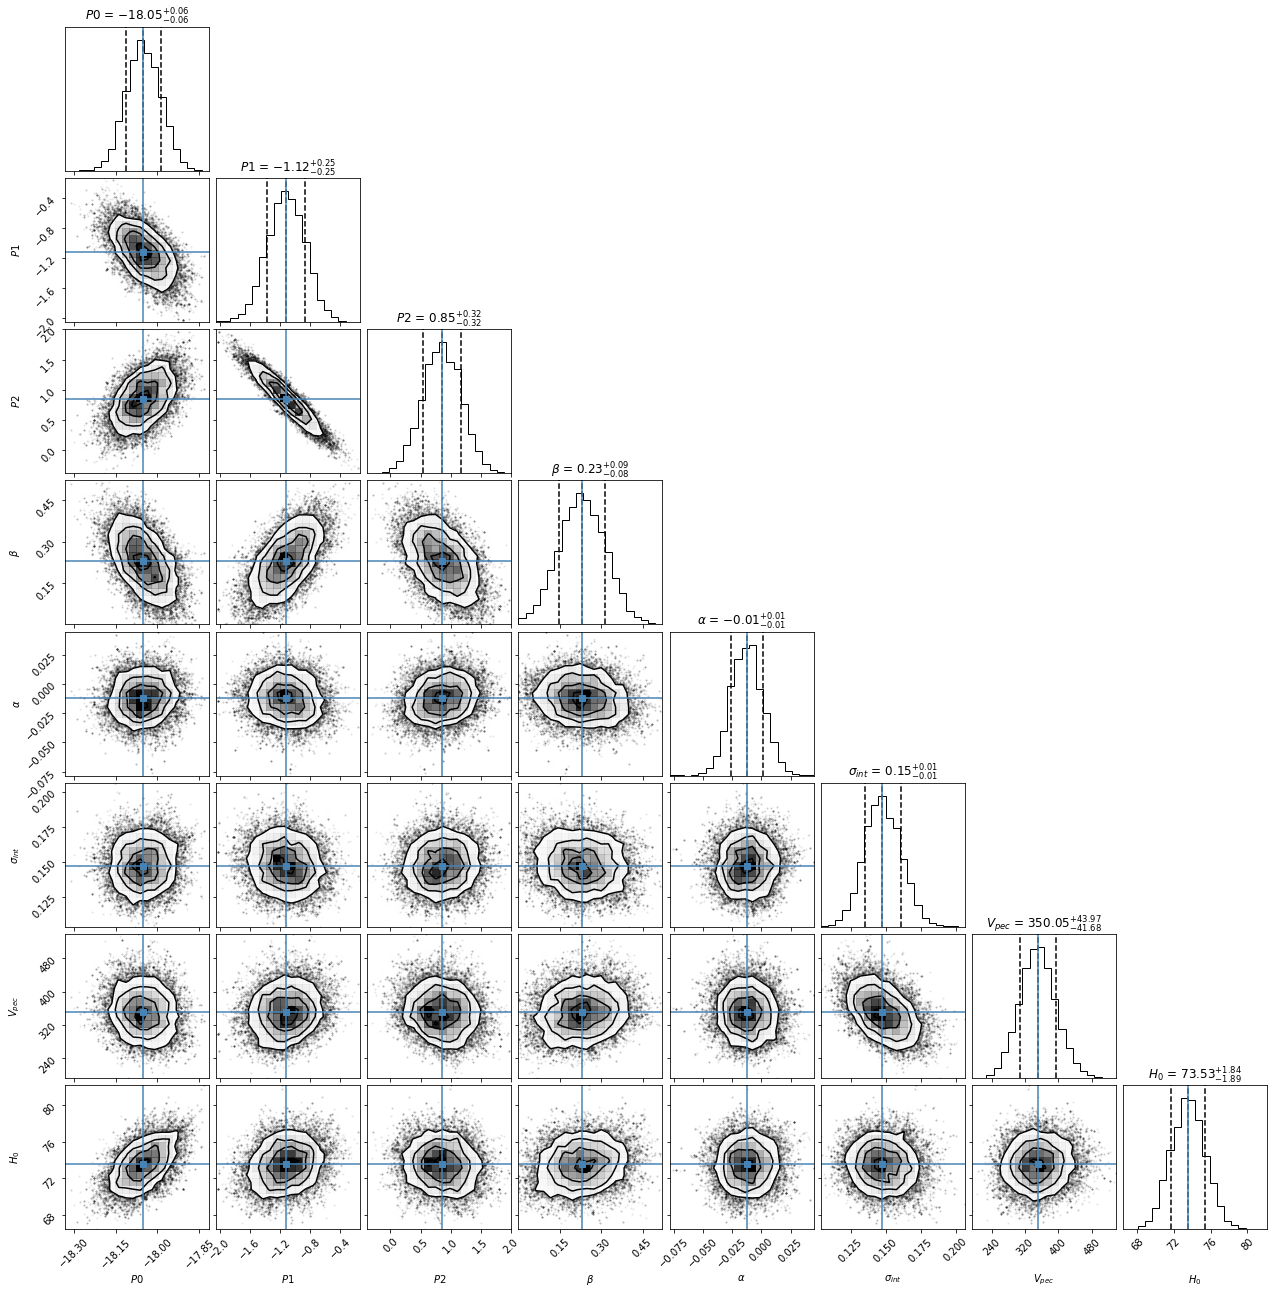

In [72]:
# Triangle plot
figure = corner.corner(samples,labels=["$P0$","$P1$", "$P2$", r"$\beta$",r"$\alpha$", r"$\sigma_{int}$","$V_{pec}$", r"$H_0$"],quantiles=[0.16, 0.5, 0.84],truths=[p0_mcmc[0],p1_mcmc[0],p2_mcmc[0],rv_mcmc[0],alpha_mcmc[0],sig_mcmc[0],vel_mcmc[0],H0_mcmc[0]],show_titles=True)


figure.savefig("/Users/uddin/"+file[:-4]+"_"+str(nwalkers)+"_"+str(ssize)+".pdf")



#pl.hist(samples[:, 4], 500, color="k", histtype="step")
#pl.savefig("H0.pdf")


print("Serial took {0:.1f} minutes".format(serial_time/60.))